In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fundus-pytorch/val/0/OIA-ODIR-TEST-ONLINE-577.png
/kaggle/input/fundus-pytorch/val/0/REFUGE1-train-211.png
/kaggle/input/fundus-pytorch/val/0/OIA-ODIR-TRAIN-823.png
/kaggle/input/fundus-pytorch/val/0/PAPILA-387.png
/kaggle/input/fundus-pytorch/val/0/OIA-ODIR-TRAIN-2843.png
/kaggle/input/fundus-pytorch/val/0/REFUGE1-val-102.png
/kaggle/input/fundus-pytorch/val/0/OIA-ODIR-TRAIN-2249.png
/kaggle/input/fundus-pytorch/val/0/OIA-ODIR-TEST-ONLINE-866.png
/kaggle/input/fundus-pytorch/val/0/BEH-373.png
/kaggle/input/fundus-pytorch/val/0/G1020-230.png
/kaggle/input/fundus-pytorch/val/0/OIA-ODIR-TRAIN-2437.png
/kaggle/input/fundus-pytorch/val/0/OIA-ODIR-TRAIN-1805.png
/kaggle/input/fundus-pytorch/val/0/JSIEC-1000-10.png
/kaggle/input/fundus-pytorch/val/0/OIA-ODIR-TRAIN-655.png
/kaggle/input/fundus-pytorch/val/0/OIA-ODIR-TRAIN-285.png
/kaggle/input/fundus-pytorch/val/0/OIA-ODIR-TRAIN-2346.png
/kaggle/input/fundus-pytorch/val/0/FIVES-252.png
/kaggle/input/fundus-pytorch/val/0/OIA-ODIR

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [28]:
tf.__version__ 

'2.15.0'

In [29]:
! ls /kaggle/input/fundus-pytorch/train

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


0  1


In [30]:
! ls /kaggle/input/fundus-pytorch/train/0 | head 

BEH-172.png
BEH-174.png
BEH-175.png
BEH-176.png
BEH-178.png
BEH-179.png
BEH-180.png
BEH-181.png
BEH-182.png
BEH-183.png
ls: write error: Broken pipe


In [31]:
! ls /kaggle/input/fundus-pytorch/train/1 | head 

BEH-1.png
BEH-10.png
BEH-100.png
BEH-101.png
BEH-102.png
BEH-103.png
BEH-105.png
BEH-106.png
BEH-107.png
BEH-108.png
ls: write error: Broken pipe


In [32]:
PATH =  '/kaggle/input/fundus-pytorch/'
train_dir = os.path.join(PATH, 'train')
train_dir

'/kaggle/input/fundus-pytorch/train'

In [33]:
# directory with our training normal pictures
train_nor_dir = os.path.join(train_dir, '0')  
# directory with our training glaucoma pictures
train_glau_dir = os.path.join(train_dir, '1')  
train_nor_dir, train_glau_dir

('/kaggle/input/fundus-pytorch/train/0',
 '/kaggle/input/fundus-pytorch/train/1')

In [34]:
num_normal_tr = len(os.listdir(train_nor_dir))
num_glaucoma_tr = len(os.listdir(train_glau_dir))
num_normal_tr, num_glaucoma_tr

(5293, 3328)

In [35]:
total_train = num_normal_tr + num_glaucoma_tr
total_train

8621

In [36]:
batch_size = 32
epochs = 25
IMG_SIZE = 224

In [21]:
def create_dataframe(path):
    data = []
    for value in os.listdir(path):
        for image in os.listdir(path + "/"+ value ):
            file_path = path + "/" + value  + image
            # if hemmorhage than set if to 1 else 0
            hemmorhage = 1 if value.lower() == "vm" else 0
            data.append({"path": file_path, 'hemmorhage': hemmorhage})
            
    df = pd.DataFrame(data=data).sample(frac=1).reset_index(drop=True)

    return df.

In [18]:
df.info()

NameError: name 'df' is not defined

In [37]:
Test_Path = "/kaggle/input/fundus-pytorch/test"
Training_Path = "/kaggle/input/fundus-pytorch/train"
Validation_Path = "/kaggle/input/fundus-pytorch/val"

In [24]:


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

# Assuming Test_Path, Training_Path, and Validation_Path are defined somewhere in your code
# create_dataframe function is assumed to return a DataFrame with 'path' and 'label' columns

def plot_imgs(title, paths):
    print("Number of images:", len(paths))
    print("Sample paths and labels:")
    print(paths.head())
    
    fig = plt.figure(figsize=(14, 8), dpi=72)
    fig.suptitle(title, fontsize=24, y=1.05)
    num_images = min(15, len(paths))  # Limit the number of images to 15 or the size of the population
    for i in range(num_images):
        img = mpimg.imread(paths.iloc[i]['path'])
        plt.subplot(3, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        subtitle = 'Glaucoma' if paths.iloc[i]['label'] == 1 else 'Normal'
        plt.title(subtitle)
        plt.imshow(img)
    plt.tight_layout()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None)
    plt.show()

# Assuming create_dataframe function is defined elsewhere
# Ensure that it returns a DataFrame with 'path' and 'label' columns

# Now you can call the function with your data
# Assuming create_dataframe function is defined elsewhere
# Assuming Test_Path, Training_Path, and Validation_Path are defined elsewhere
# Sample the data if it's larger than 15
test_data = create_dataframe(Test_Path)
train_data = create_dataframe(Training_Path)
validation_data = create_dataframe(Validation_Path)

plot_imgs("Test", test_data.sample(min(15, len(test_data))).reset_index(drop=True))
plot_imgs("Train", train_data.sample(min(15, len(train_data))).reset_index(drop=True))
plot_imgs("Validation", validation_data.sample(min(15, len(validation_data))).reset_index(drop=True))


Number of images: 0
Sample paths and labels:
Empty DataFrame
Columns: []
Index: []


<Figure size 1008x576 with 0 Axes>

Number of images: 0
Sample paths and labels:
Empty DataFrame
Columns: []
Index: []


<Figure size 1008x576 with 0 Axes>

Number of images: 0
Sample paths and labels:
Empty DataFrame
Columns: []
Index: []


<Figure size 1008x576 with 0 Axes>

In [38]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=15,
                    width_shift_range=.1,
                    height_shift_range=.1,
                    horizontal_flip=True,
                    zoom_range=0.1, 
                    brightness_range=[0.8,1.0]
                    )

In [39]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SIZE, IMG_SIZE),
                                                     class_mode='binary', 
)

Found 8621 images belonging to 2 classes.


In [40]:
val_dir="/kaggle/input/fundus-pytorch/val"
validation_datagen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=val_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SIZE, IMG_SIZE),
                                                     class_mode='binary', 
)

Found 5747 images belonging to 2 classes.


In [47]:
label_mapping = {0: "normal", 1: "glaucoma"}
labels = {label_mapping[value]: key for key, value in train_data_gen.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

normal : 0
glaucoma : 1


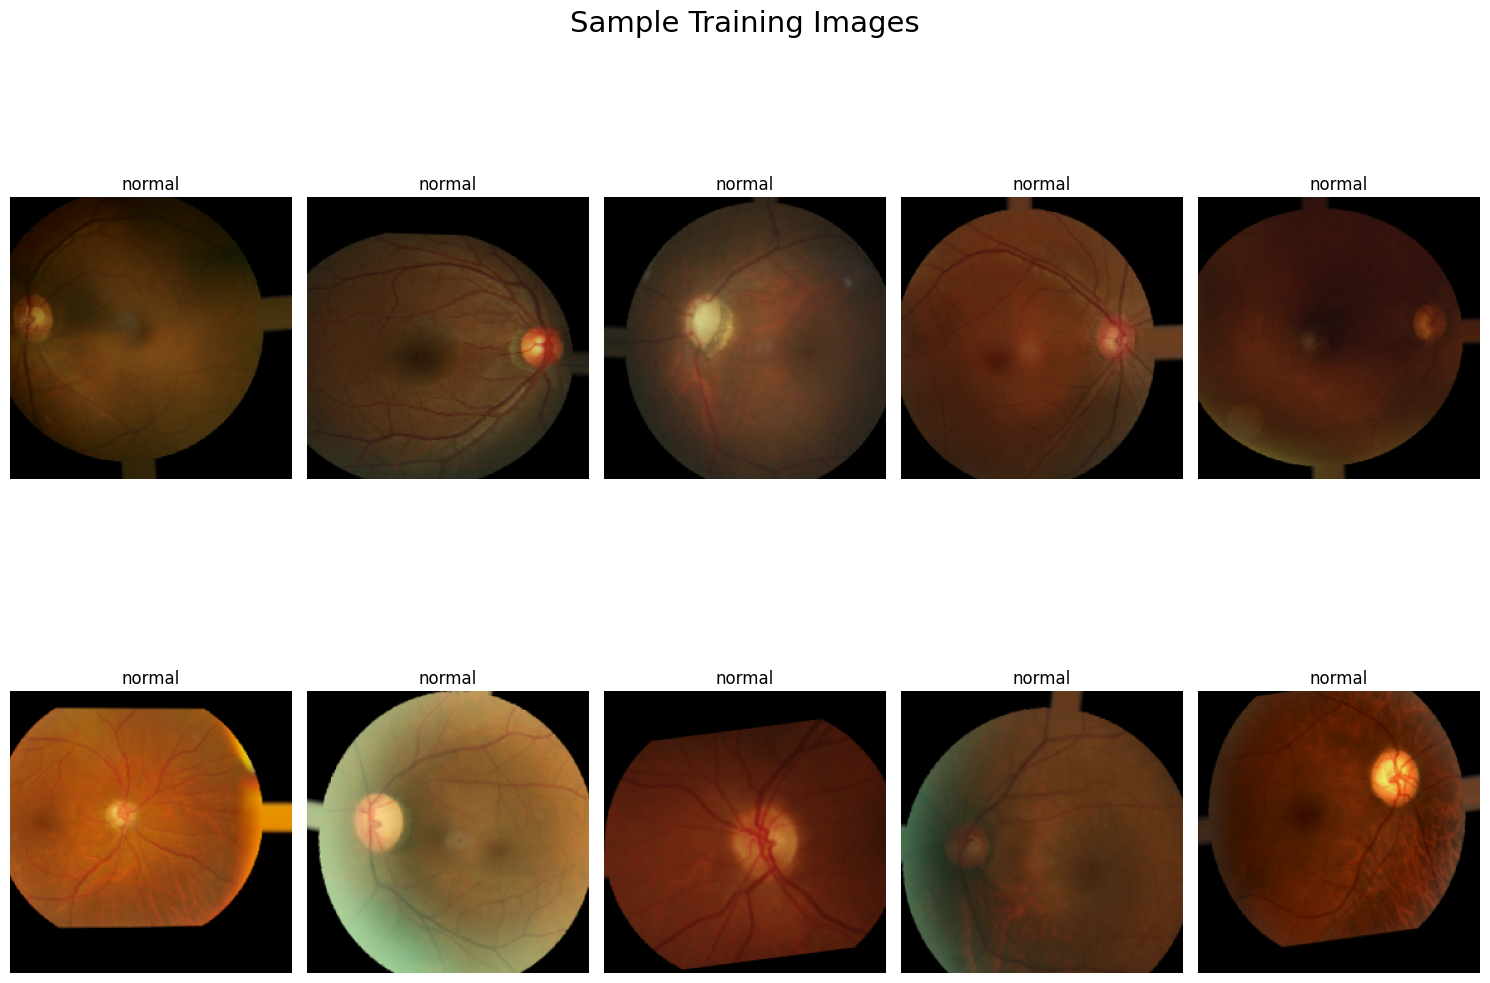

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label_index = np.argmax(train_data_gen[0][1][idx])
        label = list(labels.keys())[label_index]  # Get the key corresponding to the label index
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_data_gen[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [49]:
sample_training_images, _ = next(train_data_gen)


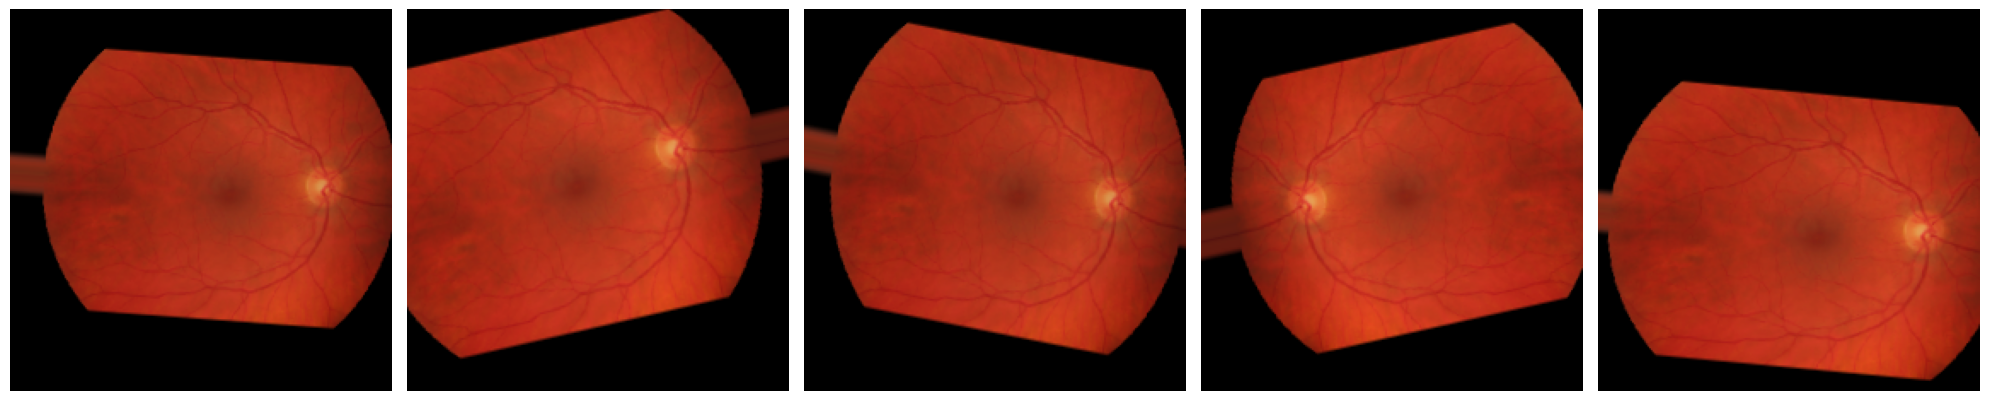

In [50]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [51]:
IMG_SHAPE=(IMG_SIZE, IMG_SIZE, 3)
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [52]:
base_model.trainable = False

In [53]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [54]:
image_batch = sample_training_images[:batch_size]
image_batch.shape

(32, 224, 224, 3)

In [55]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [56]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [57]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [58]:
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [59]:
len(model.trainable_variables)

0

In [61]:

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
es = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
mc = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='accuracy', mode='max', verbose=1, save_best_only=True)

# fit model
history = model.fit(train_data_gen,
                    epochs=1, 
                    validation_data=validation_datagen,
                    callbacks=[es, mc]
                    )

270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7318 - loss: 1.4611
Epoch 1: accuracy improved from -inf to 0.74121, saving model to best_model.keras
270/270 ━━━━━━━━━━━━━━━━━━━━ 577s 2s/step - accuracy: 0.7318 - loss: 1.4611 - val_accuracy: 0.8025 - val_loss: 0.9183


In [62]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [64]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import accuracy_score
import cv2

def preprocess_imgs(path, img_size):
    set_new = []
    for category in os.listdir(path):
        category_path = os.path.join(path, category)
        for img in os.listdir(category_path):
            img_path = os.path.join(category_path, img)
            img = cv2.imread(img_path)
            img = cv2.resize(img, dsize=img_size, interpolation=cv2.INTER_CUBIC)
            img = preprocess_input(img)
            set_new.append(img)
    return np.array(set_new)

# Define the test data directory path and image size
Test_Path = "/kaggle/input/fundus-pytorch/test"
IMG_SIZE = (224, 224)

# Preprocess test data
test_data = preprocess_imgs(Test_Path, img_size=IMG_SIZE)

# Define the ground truth labels
reality = []
for category in os.listdir(Test_Path):
    for img in os.listdir(os.path.join(Test_Path, category)):
        reality.append(int(category))  # Convert category name to integer label

# Predict using the model
predictions = model.predict(test_data)
predictions = [1 if x > 0.5 else 0 for x in predictions]  # Assuming binary classification

# Calculate test accuracy
accuracy = accuracy_score(reality, predictions)
print("Test Accuracy:", accuracy)


90/90 ━━━━━━━━━━━━━━━━━━━━ 65s 718ms/step
Test Accuracy: 0.697286012526096


NameError: name 'train_accuracy' is not defined

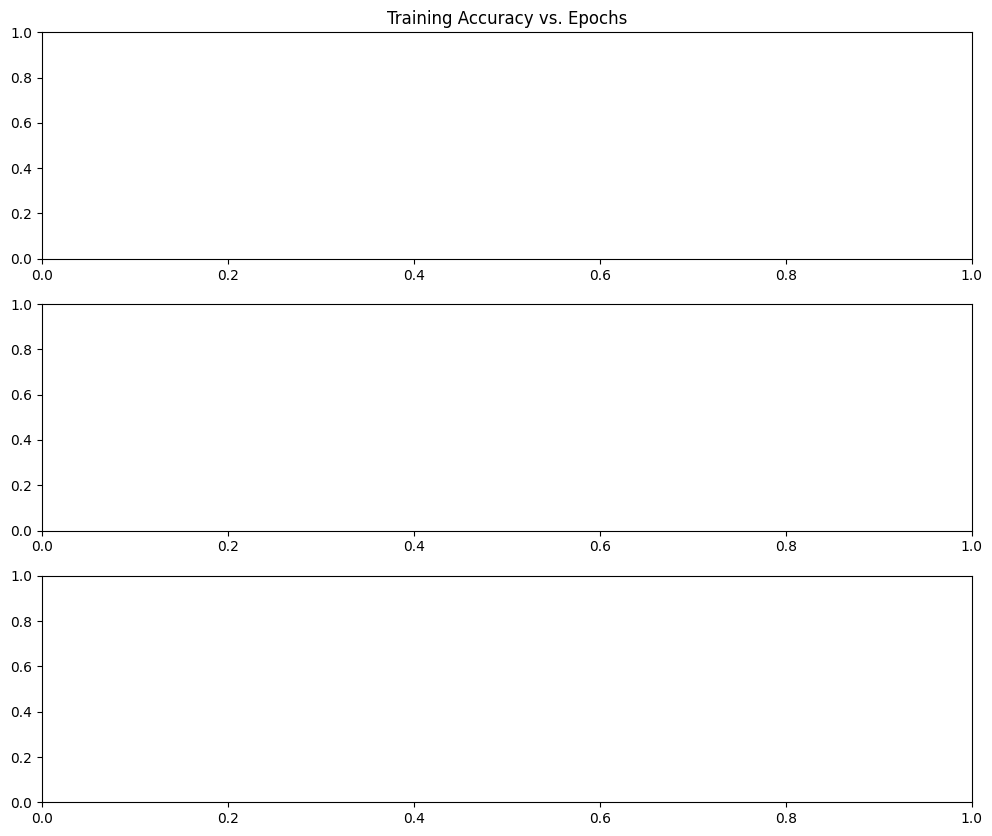

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(history.epoch) + 1)


plt.figure(figsize=(8,8))

plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,8))

plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.tight_layout()
plt.show()

In [68]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(  
        '/kaggle/input/fundus-pytorch/test',
        target_size = (IMG_SIZE, IMG_SIZE),
        batch_size = 32,
        shuffle = False,        
        class_mode = 'categorical')  

Found 2874 images belonging to 2 classes.


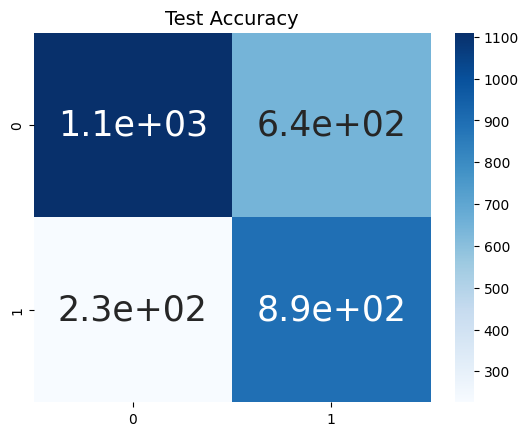

In [69]:
from sklearn.metrics import  confusion_matrix
import seaborn as sn

confusion_mtx = confusion_matrix(reality, predictions)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,annot_kws={"size": 25}, cmap="Blues", ax = ax)
ax.set_title('Test Accuracy', size=14)
plt.show()

## LIME


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

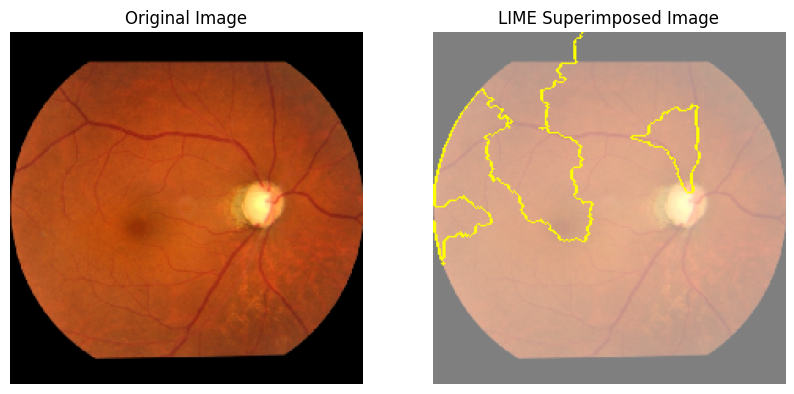

In [70]:
import numpy as np
import tensorflow as tf
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Function to apply LIME to a sample image
def apply_lime(model, img_path):
    explainer = lime_image.LimeImageExplainer()

    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))  # Resize to match VGG16 input size
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image data
    img_array = img_array.astype(np.double)  # Cast to double

    # Define the predict function for the model
    def predict_function(images):
        preds = model.predict(images)
        return preds

    # Explain the instance
    explanation = explainer.explain_instance(img_array, predict_function, top_labels=1, hide_color=0, num_samples=1000)

    # Get processed image
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

    # Create superimposed image
    superimposed_img = mark_boundaries(temp / 2 + 0.5, mask)

    return superimposed_img

# Apply LIME to a sample image from the test set
sample_img_path = "/kaggle/input/fundus-pytorch/test/1/BEH-1.png"
lime_img = apply_lime(model, sample_img_path)

# Display the original image and the LIME superimposed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(tf.keras.preprocessing.image.load_img(sample_img_path, target_size=(224, 224)))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lime_img)
plt.title('LIME Superimposed Image')
plt.axis('off')

plt.show()

## LIME V2

In [102]:
from tensorflow.keras.preprocessing import image
def lime_over_image(model, img_path, expected_class, layer_name):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    grad_model = Model(model.inputs, [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        class_index = np.argmax(predictions[0])
        loss = predictions[:, class_index]
        
    predicted_class = np.argmax(predictions[0])  # Predict the class using the model
    sample_img_path = img_path
    

    if predicted_class == expected_class:
        lime_img = apply_lime(model, sample_img_path)
        print("Glaucoma")
        plt.imshow(lime_img)
        plt.title('LIME Superimposed Image')
        plt.axis('off')

        plt.show()
        

    else:
        print("Normal")
        plt.figure(figsize=(10, 5))
        plt.imshow(tf.keras.preprocessing.image.load_img(sample_img_path, target_size=(220, 220)))
        plt.title('Original Image')
        plt.axis('off')
        plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

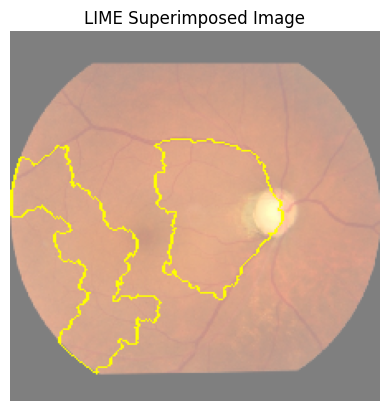

In [104]:
img_path1 = "/kaggle/input/fundus-pytorch/train/1/BEH-1.png"
layer_name = "block_16_project_BN"

lime_over_image(model, img_path1, 0, layer_name)


Normal


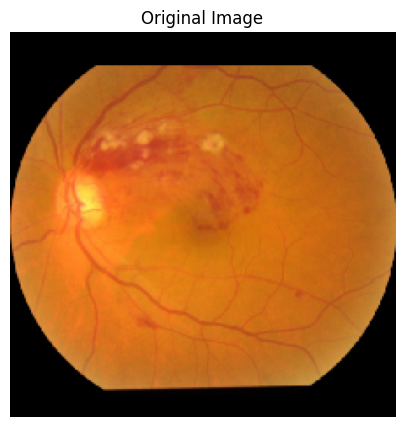

In [105]:
img_path1 = "/kaggle/input/fundus-pytorch/train/0/BEH-172.png"
lime_over_image(model, img_path1, 1, layer_name)


In [107]:
plt.figure(figsize=(18, 10))
rows, cols = 2, 5

directory = '/kaggle/input/fundus-pytorch/train'  # Update this with the path to your directory
files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]  # Filter out directories

processed_img_list = []
class_label_list = []
for i, file in enumerate(files[:10]):  # List the first 10 files in the directory
    plt.subplot(rows, cols, i+1)
    img_path = os.path.join(directory, file)
    plt.title(f'Image {file}')
    plt.axis('off')
    plt.imshow(mpimg.imread(img_path))

    # Preprocess image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    processed_img_list.append(x)
    
    # Prediction of Image
    model_MobileNetV2 = MobileNetV2(weights='imagenet', include_top=True)
    preds =model_MobileNetV2.predict(x)

    a, b, c = decode_predictions(preds, top=3)[0]
    class_label_list.append(a[1])

plt.show()


<Figure size 1800x1000 with 0 Axes>

## GradCAM

In [108]:

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
    model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
)


    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [109]:
# Function to superimpose heatmap onto original image
import matplotlib
def save_and_display_gradcam(img_array, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = matplotlib.colormaps.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img_array.shape[1], img_array.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img_array
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    return superimposed_img

In [110]:
import keras
for index in range(0,len(processed_img_list)):
    # Iterate over each image
    x = processed_img_list[index]
    image_title = f"{str.split(files[index], '.')[0]}_results.png"
    
    # Remove last layer's softmax
    model.layers[-1].activation = None

    # Print the top predicted class
    preds = model_MobileNetV2.predict(x)
    a = decode_predictions(preds, top=1)[0][0]  # Get the prediction class name and predictive score

    # Get the name of the last convolutional layer
    last_conv_layer_name = "Conv_1"
    
    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(x, model_MobileNetV2, last_conv_layer_name)

    # Superimpose heatmap on the image
    return_img = save_and_display_gradcam(x.reshape(224,224,3), heatmap, alpha=0.01)  # Pass the image path

    fig, axs = plt.subplots(1, 2, figsize=(10, 6))
    axs[0].matshow(heatmap)
    axs[0].axis('off')
    axs[0].set_title('Grad-CAM Heatmap\n'.format(a[1], a[2]*100))
    axs[1].imshow(return_img)
    axs[1].axis('off')
    axs[1].set_title('Superimposed Image\n'.format(a[1], a[2]*100))


## GRADCAM V.2

In [111]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# Load MobileNetV2 with pre-trained weights
modelInput = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

noOfClasses = 2

# Freeze MobileNetV2 layers
for layer in modelInput.layers:
    layer.trainable = False

# Add custom layers for classification
x = tf.keras.layers.GlobalAveragePooling2D()(modelInput.output)
x = tf.keras.layers.Dense(256, activation='relu')(x)
prediction = tf.keras.layers.Dense(noOfClasses, activation='softmax')(x)

# Define the model
model = Model(inputs=modelInput.input, outputs=prediction)

def grad_cam(model, img_path, expected_class, layer_name):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    grad_model = Model(model.inputs, [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        class_index = np.argmax(predictions[0])
        loss = predictions[:, class_index]

    predicted_class = np.argmax(predictions[0])  # Predict the class using the model

    if predicted_class == expected_class:
        grads = tape.gradient(loss, conv_output)[0]

        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

        conv_output = conv_output[0]

        heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
        heatmap = np.maximum(heatmap, 0)

        max_heatmap = np.max(heatmap)
        if max_heatmap == 0:
            # Handle division by zero
            heatmap_resized = heatmap
        else:
            heatmap /= max_heatmap

            # Reshape heatmap to have an additional dimension
            heatmap = np.expand_dims(heatmap, axis=-1)

            # Get the shape of the original input image
            original_img = image.load_img(img_path, target_size=(224, 224))
            original_img_shape = original_img.size

            # Resize the heatmap to match the original input image size
            heatmap_resized = tf.image.resize(heatmap, original_img_shape, method='bilinear').numpy()

            # Normalize the heatmap for visualization
            heatmap_resized = heatmap_resized - np.min(heatmap_resized)
            heatmap_resized = heatmap_resized / np.max(heatmap_resized)

        print("Positive case of VM")

        plt.imshow(heatmap_resized[:, :, 0], cmap='jet', alpha=0.6)  # Overlay heatmap on the image
        plt.imshow(original_img, alpha=0.5)  # Plot the original image
        plt.axis('off')
        plt.show()
    else:
        print("Non VM")
        # If predicted class doesn't match expected class, just display the original image
        plt.imshow(img)
        plt.axis('off')
        plt.show()

expected_class = 0

# Specify the layer for GradCAM
layer_name = "block_16_project_BN"



Positive case of VM


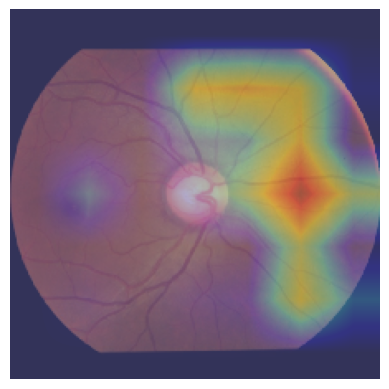

In [112]:
img_path1 = "/kaggle/input/fundus-pytorch/train/0/BEH-176.png"
grad_cam(model, img_path1, expected_class, layer_name)

Positive case of VM


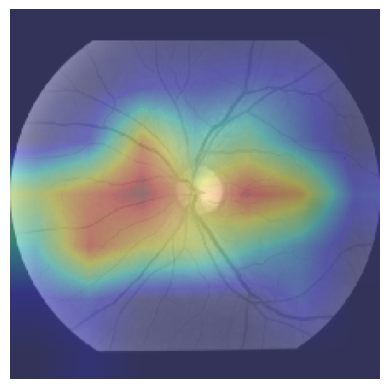

In [113]:
img_path1 = "/kaggle/input/fundus-pytorch/train/1/BEH-102.png"
grad_cam(model, img_path1, expected_class, layer_name)

## **SHAP**

In [114]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions


In [115]:
image_dir = "/kaggle/input/fundus-pytorch/train"

# List to store images and labels
images = []
labels = []

# Iterate over the images in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        img = Image.open(os.path.join(image_dir, filename))
        # Preprocess the image (resize, convert to array, and apply preprocessing)
        img = img.resize((224, 224))  # Resize the image if needed
        img_array = np.array(img)
        img_array = preprocess_input(img_array)
        # Append the preprocessed image to the list of images
        images.append(img_array)
        # Extract the label from the filename (you'll need to customize this based on your filename format)
        label = filename.split("_")[0]  # Assuming the label is the first part of the filename before underscore
        labels.append(label)

# Convert the lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Print the shape of the arrays
print("Shape of X (images):", X.shape)
print("Shape of y (labels):", y.shape)

Shape of X (images): (0,)
Shape of y (labels): (0,)


In [117]:
import shap

# Define a function to preprocess the input image and pass it through the model
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model_MobileNetV2(tmp)

# Define the masker
masker_blur = shap.maskers.Image("blur(128,128)", X[0].shape)

# Create the explainer
explainer_blur = shap.Explainer(f, masker_blur)

# Explain the SHAP values for the images
shap_values_fine = explainer_blur(
    X[1:6], max_evals=1000, batch_size=50, outputs=shap.Explanation.argsort.flip[:2]  # Changed to 2 classes
)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [118]:
print(shap_values_fine.shape)

NameError: name 'shap_values_fine' is not defined

In [119]:
# Plot SHAP values for the first image and the first output class
for i in range(shap_values_fine.shape[0]):
        # Plot SHAP values for the current sample and output class
        shap.image_plot(shap_values_fine[i])




NameError: name 'shap_values_fine' is not defined

In [59]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        62,721 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,446,149 (9.33 MB)

 Trainable params: 62,721 (245.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 125,444 (490.02 KB)